In [1]:
import os 
import sys
from tqdm import tqdm
import pickle
import importlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

module_path = '/home/lun/project-basileus/seq-gan/sgtlstm'
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
if 'sgtlstm' in sys.modules:
    importlib.reload(sys.modules['sgtlstm'])

from sgtlstm.utils import load_fixed_length_sequence_from_pickle, create_dataset, recover_timedelta_to_timestamp
from sgtlstm.SeqGan import build_G, build_D
from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3
from sgtlstm.train import generate_one_sequence_by_rollout, train_discriminator, train_generator

## Load data 

In [3]:
valid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/valid_sequences.pickle'
invalid_data_path = '/home/lun/project-basileus/seq-gan/data/fixed_length_with_init_token/invalid_sequences.pickle'

valid_event_type_seqs, valid_timestamp_seqs = load_fixed_length_sequence_from_pickle(valid_data_path, to_timedelta=True, end_token=0)
invalid_event_type_seqs, invalid_timestamp_seqs = load_fixed_length_sequence_from_pickle(invalid_data_path, to_timedelta=True, end_token=0)

## Global Variables 

In [4]:
BATCH_SIZE = 128
T = 10 + 1
VOCAB = ['END/PADDING', 'INIT', 'start', 'click', 'install']
EVENT_VOCAB_DIM = len(VOCAB)
EMB_DIM = 5
HIDDEN_DIM = 64
K_MIST = 2

END_TOKEN = 0
MAX_TIME = 1024

## Load pretrained model

In [5]:
discriminator = build_D(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST
)
discriminator.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))

D_save_path = './experiment_results/without_normalization/init_pretrained/pretrained_disc_weights/model.tf'
discriminator.load_weights(D_save_path)

No Normalization in D!
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [6]:
generator = build_G(
    T = T,
    event_vocab_dim = EVENT_VOCAB_DIM,
    emb_dim = EMB_DIM,
    hidden_dim= HIDDEN_DIM,
    k_mixt = K_MIST,
    return_sequence=False,
)
generator.build(input_shape=((BATCH_SIZE, T, 1), (BATCH_SIZE, T, 1)))

G_save_path = './experiment_results/without_normalization/init_pretrained/pretrained_gen_weights/model.tf'
generator.load_weights(G_save_path)

No Normalization in G!
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
sigma > 1 !!


In [7]:
N_gen = 10 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    print(i)
    print(list(zip(type_seq, recovered_time_seq)))

  0%|          | 0/10 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

 10%|█         | 1/10 [00:01<00:09,  1.11s/it]

0
[(1.0, 0), (2.0, 1.0), (3.0, 5.5816419628448894), (4.0, 17.703076396580627), (3.0, 29.882431361901606), (2.0, 43.79489688814911), (2.0, 48.282260138722144), (2.0, 53.02184552714252), (2.0, 66.11276204328239), (2.0, 80.42987310759683), (4.0, 92.54948931668581)]


 20%|██        | 2/10 [00:01<00:07,  1.04it/s]

1
[(1.0, 0), (2.0, 1.0), (3.0, 4.3216731882822685), (2.0, 16.86217599993555), (2.0, 20.934201333843824), (4.0, 27.35758235507049), (2.0, 31.91895014719837), (3.0, 35.94661605277953), (4.0, 49.26546713300422), (3.0, 52.71871050985188), (2.0, 64.99167869371206)]


 30%|███       | 3/10 [00:02<00:05,  1.18it/s]

2
[(1.0, 0), (2.0, 1.0), (2.0, 13.227331694034168), (3.0, 26.17098932502497), (3.0, 31.6840952876652), (2.0, 45.11357484120521), (3.0, 49.44480800789705), (4.0, 53.60993400928845), (2.0, 59.1800252818999), (4.0, 62.43261827381984), (2.0, 68.48795798779815)]


 40%|████      | 4/10 [00:02<00:04,  1.30it/s]

3
[(1.0, 0), (2.0, 1.0), (3.0, 12.709931667663053), (4.0, 16.602857194009054), (2.0, 28.7025980145103), (2.0, 42.26150551262692), (3.0, 45.51951334911464), (4.0, 49.584335442776855), (3.0, 63.53391959874731), (4.0, 77.82245222484703), (3.0, 91.69917919151958)]


 50%|█████     | 5/10 [00:03<00:03,  1.41it/s]

4
[(1.0, 0), (2.0, 1.3674697805488467), (3.0, 11.566183920050928), (3.0, 25.810669260959212), (3.0, 38.05378398787613), (2.0, 51.533374570518255), (3.0, 65.1631837616893), (4.0, 78.19045158834338), (4.0, 91.24949518477912), (2.0, 95.68557766258928), (3.0, 100.84057387690898)]


 60%|██████    | 6/10 [00:04<00:02,  1.49it/s]

5
[(1.0, 0), (2.0, 1.3434530201545458), (2.0, 7.1448913495960795), (3.0, 12.347912881900669), (2.0, 26.419578751897554), (2.0, 28.68327208869986), (3.0, 40.52874002298104), (4.0, 52.26942927270627), (2.0, 65.92012842909311), (2.0, 68.95197545868493), (3.0, 81.80900282566395)]


 70%|███████   | 7/10 [00:04<00:01,  1.56it/s]

6
[(1.0, 0), (2.0, 1.0), (2.0, 11.597394898479006), (2.0, 25.364656629109625), (2.0, 29.37549103779276), (2.0, 42.90893591429399), (2.0, 55.12836203145085), (2.0, 67.84008549329312), (2.0, 70.96469424614314), (2.0, 85.59302047974947), (2.0, 89.83628463236334)]


 80%|████████  | 8/10 [00:05<00:01,  1.61it/s]

7
[(1.0, 0), (2.0, 1.0), (2.0, 6.089577709579218), (3.0, 11.081607796028374), (4.0, 15.81239716872501), (3.0, 19.432706424791558), (3.0, 21.57572133881008), (3.0, 27.1706963211751), (3.0, 41.438986828159514), (3.0, 45.776675798106695), (4.0, 59.24830459037339)]


 90%|█████████ | 9/10 [00:05<00:00,  1.62it/s]

8
[(1.0, 0), (2.0, 1.0), (2.0, 13.614430030288117), (2.0, 15.646671618858647), (2.0, 19.06211867016767), (3.0, 30.500951021572238), (3.0, 43.352562131379685), (3.0, 57.627939280190205), (3.0, 72.16390009822507), (3.0, 75.47278168655157), (2.0, 78.44363333731992)]


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

9
[(1.0, 0), (2.0, 1.8444299093416234), (2.0, 6.742266887188945), (3.0, 10.079040949770492), (4.0, 21.60756137518848), (2.0, 25.719824076994318), (3.0, 28.9910733504424), (3.0, 34.30085148700104), (2.0, 37.724451785046234), (4.0, 42.76084803509861), (4.0, 46.98907736862318)]


# Train G and D for 1 epochs

In [8]:
train_et = valid_event_type_seqs
train_ts = valid_timestamp_seqs

train_labels = np.ones((valid_event_type_seqs.shape[0], 1))

train_features = (train_et, train_ts)
N_train = train_et.shape[0]

In [9]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=2,
                         buffer_size=N_train)

gen_token_loss_history = []
gen_gaussian_loss_history = []

disc_token_loss_history = []
disc_gaussian_loss_history = []

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 2
_D_STEPS = 1

In [10]:
_TOTAL_STEPS = 80

step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

1it [01:52, 112.91s/it]

Training Step: 2


2it [03:36, 110.19s/it]

Training Step: 3


3it [05:18, 107.55s/it]

Training Step: 4


4it [07:01, 106.20s/it]

Training Step: 5


5it [08:42, 104.81s/it]

Training Step: 6


6it [10:25, 104.22s/it]

Training Step: 7


7it [12:07, 103.63s/it]

Training Step: 8


8it [13:47, 102.57s/it]

Training Step: 9


9it [15:29, 102.28s/it]

Training Step: 10


10it [17:11, 102.29s/it]

Training Step: 11


11it [18:54, 102.37s/it]

Training Step: 12


12it [20:34, 101.77s/it]

Training Step: 13


13it [22:16, 101.82s/it]

Training Step: 14


14it [23:58, 101.76s/it]

Training Step: 15


15it [25:39, 101.59s/it]

Training Step: 16


16it [27:23, 102.26s/it]

Training Step: 17


17it [29:06, 102.50s/it]

Training Step: 18


18it [30:48, 102.25s/it]

Training Step: 19


19it [32:32, 102.95s/it]

Training Step: 20


20it [34:14, 102.60s/it]

Training Step: 21


21it [35:57, 102.68s/it]

Training Step: 22


22it [37:39, 102.67s/it]

Training Step: 23


23it [39:22, 102.60s/it]

Training Step: 24


24it [41:05, 102.77s/it]

Training Step: 25


25it [42:46, 102.23s/it]

Training Step: 26


26it [44:29, 102.38s/it]

Training Step: 27


27it [46:13, 102.85s/it]

Training Step: 28


28it [47:55, 102.76s/it]

Training Step: 29


29it [49:36, 102.30s/it]

Training Step: 30


30it [51:19, 102.37s/it]

Training Step: 31


31it [52:59, 101.78s/it]

Training Step: 32


32it [54:42, 102.14s/it]

Training Step: 33


33it [56:24, 101.95s/it]

Training Step: 34


34it [58:06, 102.02s/it]

Training Step: 35


35it [59:50, 102.62s/it]

Training Step: 36


36it [1:01:33, 102.70s/it]

Training Step: 37


37it [1:03:16, 102.66s/it]

Training Step: 38


38it [1:05:00, 103.13s/it]

Training Step: 39


39it [1:06:42, 102.72s/it]

Training Step: 40


40it [1:08:23, 102.36s/it]

Training Step: 41


41it [1:10:05, 102.37s/it]

Training Step: 42


42it [1:11:46, 101.75s/it]

Training Step: 43


43it [1:13:27, 101.66s/it]

Training Step: 44


44it [1:15:10, 102.09s/it]

Training Step: 45


45it [1:16:52, 101.95s/it]

Training Step: 46


46it [1:18:32, 101.44s/it]

Training Step: 47


47it [1:20:15, 101.72s/it]

Training Step: 48


48it [1:21:55, 101.32s/it]

Training Step: 49


49it [1:23:38, 101.76s/it]

Training Step: 50


50it [1:25:20, 101.81s/it]

Training Step: 51


51it [1:27:00, 101.30s/it]

Training Step: 52


52it [1:28:42, 101.50s/it]

Training Step: 53


53it [1:30:25, 102.02s/it]

Training Step: 54


54it [1:32:04, 101.12s/it]

Training Step: 55


55it [1:33:45, 101.00s/it]

Training Step: 56


56it [1:35:27, 101.36s/it]

Training Step: 57


57it [1:37:08, 101.28s/it]

Training Step: 58


58it [1:38:50, 101.46s/it]

Training Step: 59


59it [1:40:29, 100.80s/it]

Training Step: 60


60it [1:42:12, 101.49s/it]

Training Step: 61


61it [1:43:53, 101.36s/it]

Training Step: 62


62it [1:45:34, 101.21s/it]

Training Step: 63


63it [1:47:17, 101.63s/it]

Training Step: 64


64it [1:48:58, 101.42s/it]

Training Step: 65


65it [1:50:38, 101.19s/it]

Training Step: 66


66it [1:52:22, 101.87s/it]

Training Step: 67


67it [1:54:06, 102.42s/it]

Training Step: 68


68it [1:55:47, 102.15s/it]

Training Step: 69


69it [1:57:30, 102.37s/it]

Training Step: 70


70it [1:59:13, 102.46s/it]

Training Step: 71


71it [2:00:54, 102.03s/it]

Training Step: 72


72it [2:02:34, 101.68s/it]

Training Step: 73


73it [2:04:16, 101.55s/it]

Training Step: 74


74it [2:05:56, 101.28s/it]

Training Step: 75


75it [2:07:40, 101.90s/it]

Training Step: 76


76it [2:09:20, 101.51s/it]

Training Step: 77


77it [2:11:00, 101.09s/it]

Training Step: 78


78it [2:12:43, 101.55s/it]

Training Step: 79


79it [2:14:23, 100.93s/it]

Training Step: 80


80it [2:16:04, 102.05s/it]


## 1 epochs: Loss over training

Text(0.5, 0, 'training steps')

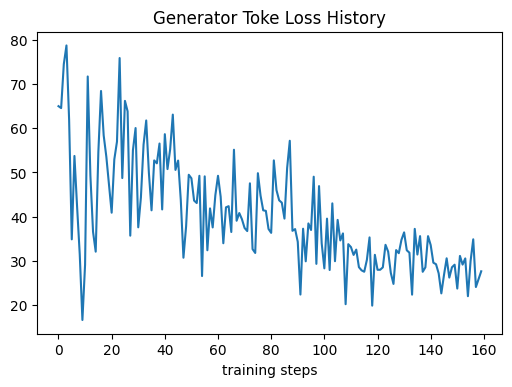

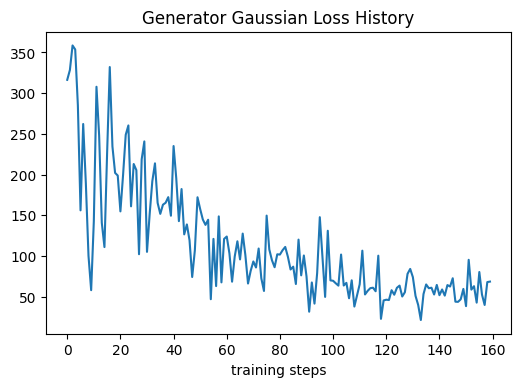

In [11]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

Text(0.5, 0, 'training steps')

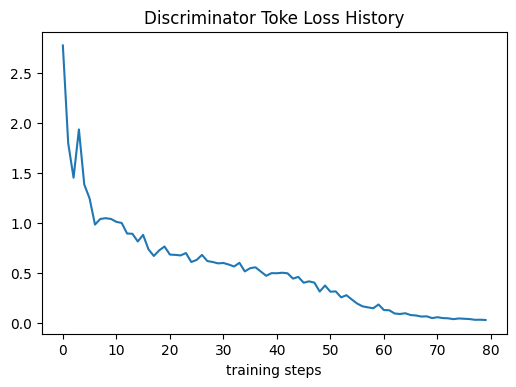

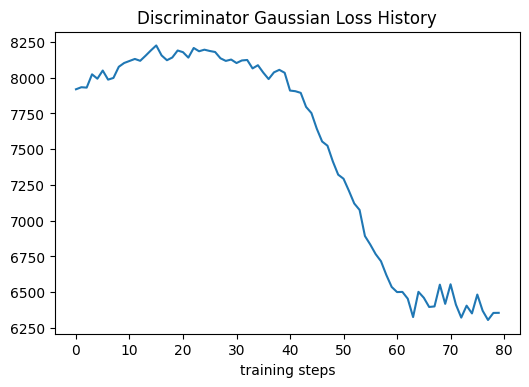

In [12]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [13]:
loss_save_dir = './experiment_results/after_1_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 1 epochs: Save G and D models

In [14]:
G_save_dir = './experiment_results/after_1_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [15]:
D_save_dir = './experiment_results/after_1_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 1 epochs: Generate sequences 

In [16]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

  0%|          | 1/1000 [00:00<09:30,  1.75it/s]

0
[(1.0, 0), (2.0, 1.0), (2.0, 2.2489256027566626), (3.0, 3.2489256027566626), (2.0, 4.248925602756662), (2.0, 5.248925602756662), (4.0, 6.248925602756662), (3.0, 9.562372600442519), (2.0, 10.94198416090957), (3.0, 11.94198416090957), (2.0, 12.94198416090957)]


 10%|█         | 101/1000 [00:57<08:29,  1.77it/s]

100
[(1.0, 0), (2.0, 1.0), (3.0, 2.589911462672429), (3.0, 3.589911462672429), (4.0, 6.2237343043050775), (3.0, 7.2237343043050775), (2.0, 8.223734304305077), (3.0, 10.577828982763924), (2.0, 11.577828982763924), (2.0, 12.577828982763924), (4.0, 13.577828982763924)]


 20%|██        | 201/1000 [01:54<07:32,  1.77it/s]

200
[(1.0, 0), (2.0, 1.0), (3.0, 3.012146793223245), (3.0, 4.012146793223245), (2.0, 5.012146793223245), (3.0, 17.765731218772167), (3.0, 20.93078366915592), (2.0, 23.708569799706908), (4.0, 24.708569799706908), (2.0, 25.708569799706908), (2.0, 26.708569799706908)]


 30%|███       | 301/1000 [02:50<06:39,  1.75it/s]

300
[(1.0, 0), (2.0, 1.0), (2.0, 2.4196194189857163), (3.0, 3.7160118598234435), (2.0, 4.7160118598234435), (4.0, 6.490158027288494), (3.0, 8.320513592916138), (3.0, 9.53063252630485), (2.0, 10.53063252630485), (3.0, 11.635758608012129), (2.0, 12.85784298127789)]


 40%|████      | 401/1000 [03:48<05:46,  1.73it/s]

400
[(1.0, 0), (2.0, 1.0), (2.0, 2.911524323747727), (2.0, 3.911524323747727), (3.0, 5.421896537241959), (2.0, 7.099451958514332), (3.0, 8.590677821837872), (3.0, 9.590677821837872), (2.0, 11.118811721676211), (2.0, 13.19974041978768), (4.0, 14.936361872055627)]


 50%|█████     | 501/1000 [04:45<04:45,  1.75it/s]

500
[(1.0, 0), (2.0, 1.0), (3.0, 2.7623619878618526), (2.0, 3.7623619878618526), (3.0, 4.762361987861853), (2.0, 6.259073418480472), (2.0, 7.259073418480472), (4.0, 9.3631078592002), (3.0, 10.754040297233288), (2.0, 11.754040297233288), (2.0, 12.938895613402154)]


 60%|██████    | 601/1000 [05:43<03:50,  1.73it/s]

600
[(1.0, 0), (2.0, 1.0), (3.0, 2.0206817751321307), (2.0, 5.00928506400086), (3.0, 6.00928506400086), (2.0, 7.00928506400086), (2.0, 8.00928506400086), (2.0, 9.417284707555167), (2.0, 11.078730566984994), (3.0, 13.386074241297782), (3.0, 14.386074241297782)]


 70%|███████   | 701/1000 [06:41<02:51,  1.74it/s]

700
[(1.0, 0), (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (3.0, 4.0), (2.0, 5.0), (2.0, 6.815187599889765), (3.0, 8.510831721619063), (2.0, 9.515389115649821), (2.0, 10.515389115649821), (2.0, 11.805743846123185)]


 80%|████████  | 801/1000 [07:38<01:54,  1.74it/s]

800
[(1.0, 0), (2.0, 1.225084946773931), (3.0, 2.225084946773931), (3.0, 3.5663618798257346), (2.0, 5.84612784783036), (2.0, 8.143960052728747), (3.0, 10.972155556223738), (4.0, 11.972155556223738), (2.0, 15.109904070544758), (2.0, 16.99658126735967), (3.0, 18.71663334728533)]


 90%|█████████ | 901/1000 [08:37<00:59,  1.67it/s]

900
[(1.0, 0), (2.0, 1.0), (3.0, 2.1274203771754774), (2.0, 3.1274203771754774), (2.0, 4.127420377175477), (2.0, 5.127420377175477), (2.0, 6.127420377175477), (2.0, 7.207052630777231), (2.0, 8.656409508204325), (3.0, 9.656409508204325), (3.0, 10.656409508204325)]


100%|██████████| 1000/1000 [09:34<00:00,  1.74it/s]


In [17]:
generated_seqs_save_dir = './experiment_results/after_1_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

# Continue Training G and D for 3 more epochs, in total 4

In [18]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=3,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 2
_D_STEPS = 1
N_total = train_features[0].shape[0]
_TOTAL_STEPS = int(N_total / BATCH_SIZE * 3)

In [ ]:
step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

0it [00:00, ?it/s]

Training Step: 1


1it [01:41, 101.62s/it]

Training Step: 2


2it [03:24, 101.90s/it]

Training Step: 3


3it [05:05, 101.64s/it]

Training Step: 4


4it [06:47, 101.98s/it]

Training Step: 5


5it [08:29, 101.73s/it]

Training Step: 6


6it [10:09, 101.29s/it]

Training Step: 7


7it [11:51, 101.55s/it]

Training Step: 8


8it [13:35, 102.17s/it]

Training Step: 9


9it [15:16, 102.01s/it]

Training Step: 10


10it [16:58, 102.03s/it]

Training Step: 11


11it [18:43, 102.70s/it]

Training Step: 12


12it [20:24, 102.16s/it]

Training Step: 13


13it [22:05, 101.85s/it]

Training Step: 14


16it [27:11, 101.85s/it]

Training Step: 17


17it [28:52, 101.57s/it]

Training Step: 18


18it [30:32, 101.21s/it]

Training Step: 19


19it [32:14, 101.38s/it]

Training Step: 20


20it [33:58, 102.19s/it]

Training Step: 21


21it [35:39, 101.83s/it]

Training Step: 22


22it [37:23, 102.32s/it]

Training Step: 23


23it [39:05, 102.43s/it]

Training Step: 24


24it [40:50, 103.15s/it]

Training Step: 25


25it [42:35, 103.53s/it]

Training Step: 26


26it [44:16, 102.79s/it]

Training Step: 27


27it [45:58, 102.68s/it]

Training Step: 28


28it [47:39, 102.29s/it]

Training Step: 29


29it [49:22, 102.32s/it]

Training Step: 30


30it [51:01, 101.46s/it]

Training Step: 31


31it [52:44, 101.80s/it]

Training Step: 32


32it [54:26, 101.86s/it]

Training Step: 33


33it [56:08, 102.06s/it]

Training Step: 34


34it [57:50, 102.08s/it]

Training Step: 35


35it [59:34, 102.47s/it]

Training Step: 36


36it [1:01:15, 101.96s/it]

Training Step: 37


37it [1:02:56, 101.66s/it]

Training Step: 38


38it [1:04:38, 101.77s/it]

Training Step: 39


39it [1:06:20, 102.02s/it]

Training Step: 40


40it [1:08:02, 101.82s/it]

Training Step: 41


41it [1:09:43, 101.60s/it]

Training Step: 42


42it [1:11:26, 102.16s/it]

Training Step: 43


43it [1:13:06, 101.54s/it]

Training Step: 44


44it [1:14:53, 103.03s/it]

Training Step: 45


45it [1:16:36, 102.99s/it]

Training Step: 46


46it [1:18:21, 103.84s/it]

Training Step: 47


47it [1:20:05, 103.86s/it]

Training Step: 48


48it [1:21:50, 103.99s/it]

Training Step: 49


49it [1:23:37, 104.97s/it]

Training Step: 50


50it [1:25:26, 106.28s/it]

Training Step: 51


51it [1:27:15, 107.16s/it]

Training Step: 52


52it [1:29:13, 110.15s/it]

Training Step: 53


53it [1:31:06, 111.24s/it]

Training Step: 54


54it [1:32:59, 111.66s/it]

Training Step: 55


55it [1:34:48, 110.78s/it]

Training Step: 56


56it [1:36:33, 109.17s/it]

Training Step: 57


57it [1:38:15, 107.06s/it]

Training Step: 58


58it [1:39:56, 105.14s/it]

Training Step: 59


59it [1:41:40, 104.73s/it]

Training Step: 60


60it [1:43:21, 103.83s/it]

Training Step: 61


61it [1:45:03, 103.06s/it]

Training Step: 62


62it [1:46:46, 103.03s/it]

Training Step: 63


63it [1:48:26, 102.23s/it]

Training Step: 64


64it [1:50:11, 103.04s/it]

Training Step: 65


65it [1:51:55, 103.31s/it]

Training Step: 66


66it [1:53:38, 103.11s/it]

Training Step: 67


67it [1:55:20, 102.96s/it]

Training Step: 68


68it [1:57:05, 103.54s/it]

Training Step: 69


69it [1:58:47, 102.97s/it]

Training Step: 70


70it [2:00:31, 103.40s/it]

Training Step: 71


71it [2:02:15, 103.53s/it]

Training Step: 72


72it [2:04:04, 105.08s/it]

Training Step: 73


73it [2:05:50, 105.48s/it]

Training Step: 74


74it [2:07:34, 105.02s/it]

Training Step: 75


75it [2:09:22, 106.05s/it]

Training Step: 76


76it [2:11:08, 105.85s/it]

Training Step: 77


77it [2:12:53, 105.66s/it]

Training Step: 78


78it [2:14:39, 105.66s/it]

Training Step: 79


79it [2:16:24, 105.56s/it]

Training Step: 80


80it [2:18:09, 105.49s/it]

Training Step: 81


81it [2:19:55, 105.47s/it]

Training Step: 82


82it [2:21:38, 104.70s/it]

Training Step: 83


83it [2:23:23, 104.92s/it]

Training Step: 84


84it [2:25:09, 105.18s/it]

Training Step: 85


85it [2:26:56, 105.82s/it]

Training Step: 86


86it [2:28:43, 106.10s/it]

Training Step: 87


87it [2:30:33, 107.40s/it]

Training Step: 88


88it [2:32:19, 107.00s/it]

Training Step: 89


89it [2:34:05, 106.49s/it]

Training Step: 90


90it [2:35:52, 106.66s/it]

Training Step: 91


91it [2:37:39, 106.95s/it]

Training Step: 92


92it [2:39:31, 108.43s/it]

Training Step: 93


93it [2:41:20, 108.66s/it]

Training Step: 94


94it [2:43:06, 107.66s/it]

Training Step: 95


95it [2:44:53, 107.52s/it]

Training Step: 96


96it [2:46:41, 107.60s/it]

Training Step: 97


97it [2:48:33, 109.02s/it]

Training Step: 98


98it [2:50:24, 109.71s/it]

Training Step: 99


99it [2:52:14, 109.71s/it]

Training Step: 100


100it [2:54:04, 109.80s/it]

Training Step: 101


101it [2:55:51, 108.79s/it]

Training Step: 102


102it [2:57:44, 110.16s/it]

Training Step: 103


103it [2:59:30, 109.03s/it]

Training Step: 104


104it [3:01:19, 108.88s/it]

Training Step: 105


105it [3:03:10, 109.44s/it]

Training Step: 106


106it [3:04:56, 108.56s/it]

Training Step: 107


107it [3:06:45, 108.62s/it]

Training Step: 108


108it [3:08:30, 107.50s/it]

Training Step: 109


109it [3:10:20, 108.23s/it]

Training Step: 110


110it [3:12:04, 106.91s/it]

Training Step: 111


111it [3:13:51, 107.18s/it]

Training Step: 112


112it [3:15:36, 106.53s/it]

Training Step: 113


113it [3:17:19, 105.28s/it]

Training Step: 114


114it [3:19:04, 105.40s/it]

Training Step: 115


115it [3:20:49, 105.17s/it]

Training Step: 116


116it [3:22:39, 106.70s/it]

Training Step: 117


117it [3:24:25, 106.47s/it]

Training Step: 118


118it [3:26:11, 106.30s/it]

Training Step: 119


119it [3:27:54, 105.38s/it]

Training Step: 120


120it [3:29:38, 104.97s/it]

Training Step: 121


121it [3:31:24, 105.04s/it]

Training Step: 122


122it [3:33:10, 105.55s/it]

Training Step: 123


123it [3:35:02, 107.29s/it]

Training Step: 124


124it [3:36:55, 109.14s/it]

Training Step: 125


125it [3:38:46, 109.66s/it]

Training Step: 126


126it [3:40:37, 109.94s/it]

Training Step: 127


127it [3:42:25, 109.41s/it]

Training Step: 128


128it [3:44:13, 108.94s/it]

Training Step: 129


129it [3:46:00, 108.49s/it]

Training Step: 130


130it [3:47:44, 107.15s/it]

Training Step: 131


131it [3:49:28, 106.15s/it]

Training Step: 132


132it [3:51:14, 106.00s/it]

Training Step: 133


133it [3:53:03, 106.94s/it]

Training Step: 134


134it [3:54:49, 106.65s/it]

Training Step: 135


135it [3:56:34, 106.22s/it]

Training Step: 136


136it [3:58:23, 106.98s/it]

Training Step: 137


137it [4:00:09, 106.74s/it]

Training Step: 138


138it [4:01:53, 106.00s/it]

Training Step: 139


139it [4:03:44, 107.52s/it]

Training Step: 140


140it [4:05:32, 107.50s/it]

Training Step: 141


141it [4:07:13, 105.71s/it]

Training Step: 142


142it [4:09:00, 106.03s/it]

Training Step: 143


143it [4:10:43, 105.17s/it]

Training Step: 144


144it [4:12:26, 104.51s/it]

Training Step: 145


145it [4:14:13, 105.27s/it]

Training Step: 146


146it [4:15:59, 105.37s/it]

Training Step: 147


147it [4:17:47, 106.26s/it]

Training Step: 148


148it [4:19:34, 106.52s/it]

Training Step: 149


149it [4:21:23, 107.13s/it]

Training Step: 150


150it [4:23:09, 107.02s/it]

Training Step: 151


151it [4:24:55, 106.50s/it]

Training Step: 152


152it [4:26:42, 106.79s/it]

Training Step: 153


153it [4:28:27, 106.09s/it]

Training Step: 154


154it [4:30:13, 106.26s/it]

Training Step: 155


155it [4:31:56, 105.13s/it]

Training Step: 156


156it [4:33:41, 105.25s/it]

Training Step: 157


157it [4:35:28, 105.55s/it]

Training Step: 158


158it [4:37:13, 105.56s/it]

Training Step: 159


159it [4:39:00, 105.81s/it]

Training Step: 160


160it [4:40:42, 104.91s/it]

Training Step: 161


161it [4:42:28, 105.13s/it]

Training Step: 162


162it [4:44:15, 105.72s/it]

Training Step: 163


163it [4:45:58, 104.87s/it]

Training Step: 164


164it [4:47:42, 104.73s/it]

Training Step: 165


165it [4:49:28, 104.92s/it]

Training Step: 166


166it [4:51:17, 106.35s/it]

Training Step: 167


167it [4:53:04, 106.45s/it]

Training Step: 168


168it [4:54:49, 105.92s/it]

Training Step: 169


169it [4:56:32, 105.01s/it]

Training Step: 170


170it [4:58:18, 105.32s/it]

Training Step: 171


171it [5:00:03, 105.21s/it]

Training Step: 172


172it [5:01:48, 105.28s/it]

Training Step: 173


173it [5:03:34, 105.31s/it]

Training Step: 174


174it [5:05:23, 106.55s/it]

Training Step: 175


175it [5:07:13, 107.53s/it]

Training Step: 176


176it [5:09:05, 109.06s/it]

Training Step: 177


177it [5:10:53, 108.63s/it]

Training Step: 178


178it [5:12:44, 109.36s/it]

Training Step: 179


179it [5:14:33, 109.23s/it]

Training Step: 180


180it [5:16:21, 108.92s/it]

Training Step: 181


181it [5:18:09, 108.58s/it]

Training Step: 182


182it [5:20:00, 109.35s/it]

Training Step: 183


183it [5:21:49, 109.06s/it]

Training Step: 184


184it [5:23:41, 110.11s/it]

Training Step: 185


185it [5:25:28, 109.19s/it]

Training Step: 186


186it [5:27:20, 109.99s/it]

Training Step: 187


187it [5:29:08, 109.53s/it]

Training Step: 188


188it [5:30:57, 109.14s/it]

Training Step: 189


189it [5:32:46, 109.05s/it]

Training Step: 190


190it [5:34:33, 108.55s/it]

Training Step: 191


## 4 epochs: Loss over training

In [ ]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/after_4_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 4 epochs: Save G and D models

In [ ]:
G_save_dir = './experiment_results/after_4_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [ ]:
D_save_dir = './experiment_results/after_4_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 4 epochs: Generate sequences 

In [ ]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

In [ ]:
generated_seqs_save_dir = './experiment_results/after_4_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

# Continue Training G and D for 4 more epochs, in total 8

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=4,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 2
_D_STEPS = 1
N_total = train_features[0].shape[0]

_TOTAL_STEPS = int(N_total / BATCH_SIZE * 4)

In [ ]:
step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

## 8 epochs: Loss over training 

In [ ]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/after_8_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 8 epochs: save G and D

In [ ]:
G_save_dir = './experiment_results/after_8_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [ ]:
D_save_dir = './experiment_results/after_8_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 8 epochs: Generate Sequences

In [ ]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

In [ ]:
generated_seqs_save_dir = './experiment_results/after_8_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

## Continue Training G and D for 8 more epochs, in total 22, but change G : D ratio to 8 : 1

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=8,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-2
_G_STEPS = 8
_D_STEPS = 1
N_total = train_features[0].shape[0]

In [ ]:
_TOTAL_STEPS = int(N_total / BATCH_SIZE * 8)

step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

 ## 22 epochs: Loss over training 

In [ ]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/after_22_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 22 epochs: save G and D

In [ ]:
G_save_dir = './experiment_results/after_22_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [ ]:
D_save_dir = './experiment_results/after_22_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 22 epochs: Generate Sequences

In [ ]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

In [ ]:
generated_seqs_save_dir = './experiment_results/after_22_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

## Continue Training G and D for 2 more epochs, in total 24, change G : D ratio to 16 : 1，and exphasize on minimizing G token loss

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
# optimizer = SGD(learning_rate=1e-4)

dataset = create_dataset(train_features,
                         train_labels,
                         batch_size=BATCH_SIZE,
                         epochs=8,
                         buffer_size=N_train)

WEIGHT_GAUSSIAN_LOSS = 1e-6
_G_STEPS = 16
_D_STEPS = 1
N_total = train_features[0].shape[0]

In [ ]:
_TOTAL_STEPS = int(N_total / BATCH_SIZE * 2)

step = 0

for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
    step += 1
    print('Training Step:', step)

    # train the generator
    for _ in range(_G_STEPS):
        gen_token_loss, gen_gaussian_loss = train_generator(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
        gen_token_loss_history.append(gen_token_loss.numpy())
        gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
    # train the discriminator
    for _ in range(_D_STEPS):
        disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
        disc_token_loss_history.append(disc_token_loss.numpy())
        disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())

## 24 epochs: Loss over training 

In [ ]:
x = range(len(gen_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_token_loss_history)
plt.title('Generator Toke Loss History')
plt.xlabel('training steps')

x = range(len(gen_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, gen_gaussian_loss_history)
plt.title('Generator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
x = range(len(disc_token_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_token_loss_history)
plt.title('Discriminator Toke Loss History')
plt.xlabel('training steps')

x = range(len(disc_gaussian_loss_history))
plt.figure(dpi=100)
plt.plot(x, disc_gaussian_loss_history)
plt.title('Discriminator Gaussian Loss History')
plt.xlabel('training steps')

In [ ]:
loss_save_dir = './experiment_results/after_24_epochs/loss'
if not os.path.exists(loss_save_dir):
    os.makedirs(loss_save_dir)

with open(os.path.join(loss_save_dir, 'gen_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'gen_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(gen_gaussian_loss_history, f)
    
with open(os.path.join(loss_save_dir, 'disc_token_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_token_loss_history, f)

with open(os.path.join(loss_save_dir, 'disc_gaussian_loss_history.pickle'), 'wb') as f:
    pickle.dump(disc_gaussian_loss_history, f)

## 24 epochs: save G and D

In [ ]:
G_save_dir = './experiment_results/after_24_epochs/gen_weights'
if not os.path.exists(G_save_dir):
    os.makedirs(G_save_dir)
    
G_save_path = os.path.join(G_save_dir, 'gen_model.tf')
generator.save_weights(G_save_path)

In [ ]:
D_save_dir = './experiment_results/after_24_epochs/disc_weights'
if not os.path.exists(D_save_dir):
    os.makedirs(D_save_dir)
    
D_save_path = os.path.join(D_save_dir, 'disc_model.tf')
discriminator.save_weights(D_save_path)

## 24 epochs: Generate Sequences

In [ ]:
N_gen = 1000 # 
generated_seqs = []

for i in tqdm(range(N_gen)):
    states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout(generator,
                                                                                               T, EVENT_VOCAB_DIM,
                                                                                               verbose=False)
    type_seq = states_et[-1,:,:].squeeze().tolist()
    time_seq = states_ts[-1,:,:].squeeze().tolist()
    recovered_time_seq = recover_timedelta_to_timestamp(time_seq)
    generated_seqs.append(list(zip(type_seq, recovered_time_seq)))
    if i % 100 == 0:
        print(i)
        print(list(zip(type_seq, recovered_time_seq)))

In [ ]:
generated_seqs_save_dir = './experiment_results/after_24_epochs/generated_seqs'
if not os.path.exists(generated_seqs_save_dir):
    os.makedirs(generated_seqs_save_dir)

with open(os.path.join(generated_seqs_save_dir, 'generated_seqs.pickle'), 'wb') as f:
    pickle.dump(generated_seqs, f)

## Problem with Generator 

1. Token Loss not decrease significantly
2. Gaussian Loss decay is good, but the range of generated time stamps is small

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras import Sequential
# from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.layers import Input, LSTM, Embedding, Reshape, Dense
# import tensorflow_probability as tfp
# from tensorflow_probability import distributions as tfd

# from sgtlstm.TimeLSTM import TimeLSTM0, TimeLSTM1, TimeLSTM2, TimeLSTM3

# tf.keras.backend.set_floatx('float64')

# def train_generator_test(generator, discriminator, T, event_vocab_dim, verbose=False, weight_gaussian_loss=1,
#                     optimizer=Adam(lr=0.001)):
#     with tf.GradientTape() as tape:
#         states_et, states_ts, episode_token_probs, gaussian_log = generate_one_sequence_by_rollout_test(generator,
#                                                                                                    T, event_vocab_dim,
#                                                                                                    verbose=verbose)
#         actual_length = episode_token_probs.shape[0]

#         gaussian_log = gaussian_log[0, 0:actual_length, 0]
#         true_prob, _, _ = discriminator((states_et, states_ts))
#         token_loss = -tf.reduce_sum(tf.math.log(episode_token_probs) * true_prob)
#         gaussian_loss = -tf.reduce_sum(gaussian_log * true_prob)
#         generator_loss = token_loss + weight_gaussian_loss * gaussian_loss

#         if verbose:
#             print('generator token loss:{}'.format(token_loss))
#             print('generator gaussian loss:{}'.format(gaussian_loss))
#             print('total generator loss:{}'.format(generator_loss / actual_length))

#     grads = tape.gradient(generator_loss, generator.trainable_variables)
# #     print(grads)
    
#     optimizer.apply_gradients(zip(grads, generator.trainable_variables))

#     return token_loss, gaussian_loss


# def generate_one_sequence_by_rollout_test(generator, T, event_vocab_dim, end_token=0, init_token=1, max_time=1024, verbose=False):
#     # Begin from dummy init state (init_token=1, init_timestamp=0.0)
#     curr_state_et = np.zeros([T])
#     curr_state_et[0] = init_token
#     curr_state_et = curr_state_et.reshape((1, T, 1))

#     curr_state_ts = np.zeros([T])
#     curr_state_ts[0] = 0.0
#     curr_state_ts = curr_state_ts.reshape((1, T, 1))

#     # whole trajectory
#     states_et = (curr_state_et)
#     states_ts = (curr_state_ts)
#     episode_token_probs = tf.constant([1., ], dtype=tf.float64)

#     for step in range(1, T):  # sequence length
#         token_prob, gaussian_log, mask, alpha, mu, sigma = generator([curr_state_et, curr_state_ts])
        
#         print('alpha', alpha)
#         print('mu', mu)
#         print('sigma', sigma)
        
#         # generate one timstamp using [alpha, mu, sigma]
#         gm = tfd.MixtureSameFamily(
#             mixture_distribution=tfd.Categorical(
#                 probs=alpha),
#             components_distribution=tfd.Normal(
#                 loc=mu,
#                 scale=sigma))

#         # sample next event token and time stamp
#         sampled_et = tf.random.categorical(token_prob, num_samples=1)
#         sampled_ts = tf.clip_by_value(gm.sample(), clip_value_min=1, clip_value_max=max_time)  # shape=[BATCH_SIZE,]

#         taken_action_idx = sampled_et.numpy().item()

#         if taken_action_idx == end_token:
#             if verbose:
#                 print('Generation ended early!')
#             break  # episode is over

#         taken_action_prob = token_prob[0][taken_action_idx]
#         taken_action_prob = tf.reshape(taken_action_prob, [1, ])
#         episode_token_probs = tf.concat([episode_token_probs, taken_action_prob], axis=0)

#         new_state_et = np.copy(curr_state_et)
#         new_state_ts = np.copy(curr_state_ts)

#         # TODO: 0 means 1 generation per batch
#         new_state_et[0, step, :] = sampled_et
#         new_state_ts[0, step, :] = sampled_ts

#         if verbose:
#             print('new_state_et', tf.squeeze(new_state_et))

#         states_et = np.concatenate((states_et, new_state_et))
#         states_ts = np.concatenate((states_ts, new_state_ts))

#         curr_state_et = new_state_et
#         curr_state_ts = new_state_ts
#         if verbose:
#             print('Generation done!')

#     if verbose:
#         print('episode length={}'.format(step + 1))
#         print('state_et =', states_et)
#         print('state_ts =', states_ts)
#         print('episode_token_probs =', episode_token_probs)
#         print('gaussian_log =', gaussian_log)

#     return states_et, states_ts, episode_token_probs, gaussian_log

In [ ]:
# _TOTAL_STEPS = 1

# step = 0

# for features_batch, _ in tqdm(dataset.take(_TOTAL_STEPS)):
#     step += 1
#     print('Training Step:', step)

#     # train the generator
#     for _ in range(_G_STEPS):
#         gen_token_loss, gen_gaussian_loss = train_generator_test(generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM,  verbose=False, weight_gaussian_loss=WEIGHT_GAUSSIAN_LOSS)
#         gen_token_loss_history.append(gen_token_loss.numpy())
#         gen_gaussian_loss_history.append(gen_gaussian_loss.numpy())        
    
#     # train the discriminator
#     for _ in range(_D_STEPS):
#         disc_token_loss, disc_gaussian_loss = train_discriminator(features_batch, generator, discriminator, T, event_vocab_dim=EVENT_VOCAB_DIM, verbose=False)              
#         disc_token_loss_history.append(disc_token_loss.numpy())
#         disc_gaussian_loss_history.append(disc_gaussian_loss.numpy())